<a href="https://colab.research.google.com/github/wwowoowow/ww/blob/main/ML_firstKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [77]:
df = pd.read_csv('/content/gdrive/MyDrive/머런/train_dataset.csv')
testD = pd.read_csv('/content/gdrive/MyDrive/머런/test_dataset.csv')

In [78]:
testD.head()

,id,station,station_name,date,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,...,wind_speed_22,wind_speed_23,wind_speed_3,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp
0,0,99,파주,06-26,0.0,0.0,0.0,1.0,3.0,6.0,...,0.5,0.3,0.2,0.9,0.8,0.6,0.9,1.0,2.0,23.964286
1,1,119,수원,01-11,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1,1.0,0.6,0.5,0.7,0.2,0.1,0.1,0.3,-2.776786
2,2,119,수원,02-23,5.0,6.0,0.0,0.0,0.0,0.0,...,0.4,0.6,0.2,0.3,1.1,0.7,0.7,1.4,1.6,2.100000
3,3,119,수원,05-29,0.0,0.0,0.0,0.0,0.0,0.0,...,1.2,0.5,0.3,0.5,1.4,0.8,1.3,0.9,1.0,19.648214
4,4,119,수원,06-15,0.0,4.0,2.0,4.0,8.0,8.0,...,1.2,2.3,0.8,0.8,0.2,1.1,0.6,3.3,1.8,21.964286


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Columns: 342 entries, id to target
dtypes: float64(338), int64(2), object(2)
memory usage: 34.3+ MB


In [80]:
print(df['station'].value_counts())

station
108    2191
112    2191
203    2189
98     2187
201    2187
202    2187
Name: count, dtype: int64


In [81]:
print(df['station_name'].value_counts())

station_name
서울     2191
인천     2191
이천     2189
동두천    2187
강화     2187
양평     2187
Name: count, dtype: int64


In [82]:
# date 손보기
df[['month', 'day']] = df['date'].str.split('-', expand=True)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

testD[['month', 'day']] = testD['date'].str.split('-', expand=True)
testD['month'] = testD['month'].astype(int)
testD['day'] = testD['day'].astype(int)

In [83]:
df = df.drop('date', axis=1)

In [84]:
testD = testD.drop('date', axis = 1)

In [85]:
df[(df['station'] == 98) & (df['month'] == 1) & (df['day'] == 1)]

,id,station,station_name,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,cloud_cover_14,...,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target,month,day
0,0,98,동두천,0.0,0.0,9.0,0.0,3.0,3.0,1.0,...,0.3,0.7,0.6,0.7,0.8,0.1,-2.707143,-3.992857,1,1
365,365,98,동두천,9.0,8.0,9.0,7.0,8.0,9.0,8.0,...,1.7,1.1,0.0,1.6,0.2,0.3,-2.707143,2.107143,1,1
731,731,98,동두천,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.7,0.9,0.0,0.8,0.1,0.1,-2.707143,-3.592857,1,1
1096,1096,98,동두천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.3,0.4,1.0,0.9,1.2,0.5,-2.707143,0.607143,1,1
1460,1460,98,동두천,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,0.4,0.3,0.4,0.1,-2.707143,-4.092857,1,1
1824,1824,98,동두천,0.0,0.0,8.0,8.0,8.0,9.0,9.0,...,NaN,NaN,NaN,NaN,-9999.0,-9999.0,-2.707143,4.607143,1,1


In [86]:
#station 전부 삭제

df = df.drop('station', axis=1)

In [87]:
testD = testD.drop('station', axis = 1)

In [88]:
#cloud_cover불측값 관측

for i in range(24):
    col = f"cloud_cover_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

cloud_cover_0: NaN = 187, -9999 = 0
cloud_cover_1: NaN = 212, -9999 = 0
cloud_cover_2: NaN = 196, -9999 = 0
cloud_cover_3: NaN = 192, -9999 = 0
cloud_cover_4: NaN = 200, -9999 = 0
cloud_cover_5: NaN = 206, -9999 = 0
cloud_cover_6: NaN = 209, -9999 = 0
cloud_cover_7: NaN = 226, -9999 = 0
cloud_cover_8: NaN = 230, -9999 = 0
cloud_cover_9: NaN = 211, -9999 = 0
cloud_cover_10: NaN = 216, -9999 = 0
cloud_cover_11: NaN = 206, -9999 = 0
cloud_cover_12: NaN = 201, -9999 = 0
cloud_cover_13: NaN = 206, -9999 = 0
cloud_cover_14: NaN = 213, -9999 = 0
cloud_cover_15: NaN = 194, -9999 = 0
cloud_cover_16: NaN = 208, -9999 = 0
cloud_cover_17: NaN = 199, -9999 = 0
cloud_cover_18: NaN = 196, -9999 = 0
cloud_cover_19: NaN = 195, -9999 = 0
cloud_cover_20: NaN = 197, -9999 = 0
cloud_cover_21: NaN = 190, -9999 = 0
cloud_cover_22: NaN = 185, -9999 = 0
cloud_cover_23: NaN = 189, -9999 = 0


In [89]:
for i in range(24):
    column_name = f'cloud_cover_{i}'
    count = df[column_name].count()
    print(f'{column_name}: {count}개')

cloud_cover_0: 12945개
cloud_cover_1: 12920개
cloud_cover_2: 12936개
cloud_cover_3: 12940개
cloud_cover_4: 12932개
cloud_cover_5: 12926개
cloud_cover_6: 12923개
cloud_cover_7: 12906개
cloud_cover_8: 12902개
cloud_cover_9: 12921개
cloud_cover_10: 12916개
cloud_cover_11: 12926개
cloud_cover_12: 12931개
cloud_cover_13: 12926개
cloud_cover_14: 12919개
cloud_cover_15: 12938개
cloud_cover_16: 12924개
cloud_cover_17: 12933개
cloud_cover_18: 12936개
cloud_cover_19: 12937개
cloud_cover_20: 12935개
cloud_cover_21: 12942개
cloud_cover_22: 12947개
cloud_cover_23: 12943개


In [90]:
cloud_cols = [col for col in df.columns if col.startswith('cloud_cover')]

# 각 컬럼에 대해 중앙값으로 결측값 보간
for col in cloud_cols:
    median_val = df[col].median(skipna=True)
    df[col] = df[col].fillna(median_val)

In [91]:
for i in range(24):
    col = f"cloud_cover_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

cloud_cover_0: NaN = 0, -9999 = 0
cloud_cover_1: NaN = 0, -9999 = 0
cloud_cover_2: NaN = 0, -9999 = 0
cloud_cover_3: NaN = 0, -9999 = 0
cloud_cover_4: NaN = 0, -9999 = 0
cloud_cover_5: NaN = 0, -9999 = 0
cloud_cover_6: NaN = 0, -9999 = 0
cloud_cover_7: NaN = 0, -9999 = 0
cloud_cover_8: NaN = 0, -9999 = 0
cloud_cover_9: NaN = 0, -9999 = 0
cloud_cover_10: NaN = 0, -9999 = 0
cloud_cover_11: NaN = 0, -9999 = 0
cloud_cover_12: NaN = 0, -9999 = 0
cloud_cover_13: NaN = 0, -9999 = 0
cloud_cover_14: NaN = 0, -9999 = 0
cloud_cover_15: NaN = 0, -9999 = 0
cloud_cover_16: NaN = 0, -9999 = 0
cloud_cover_17: NaN = 0, -9999 = 0
cloud_cover_18: NaN = 0, -9999 = 0
cloud_cover_19: NaN = 0, -9999 = 0
cloud_cover_20: NaN = 0, -9999 = 0
cloud_cover_21: NaN = 0, -9999 = 0
cloud_cover_22: NaN = 0, -9999 = 0
cloud_cover_23: NaN = 0, -9999 = 0


In [92]:
for i in range(24):
    col = f"precipitation_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

precipitation_0: NaN = 8268, -9999 = 3376
precipitation_1: NaN = 11731, -9999 = 448
precipitation_2: NaN = 11415, -9999 = 710
precipitation_3: NaN = 11167, -9999 = 343
precipitation_4: NaN = 10935, -9999 = 1114
precipitation_5: NaN = 10735, -9999 = 1293
precipitation_6: NaN = 10528, -9999 = 903
precipitation_7: NaN = 10355, -9999 = 1642
precipitation_8: NaN = 10210, -9999 = 1801
precipitation_9: NaN = 10092, -9999 = 1426
precipitation_10: NaN = 9942, -9999 = 2150
precipitation_11: NaN = 9815, -9999 = 2342
precipitation_12: NaN = 9685, -9999 = 1899
precipitation_13: NaN = 9550, -9999 = 2583
precipitation_14: NaN = 9410, -9999 = 2701
precipitation_15: NaN = 9263, -9999 = 2262
precipitation_16: NaN = 9134, -9999 = 2993
precipitation_17: NaN = 8989, -9999 = 3135
precipitation_18: NaN = 8869, -9999 = 2721
precipitation_19: NaN = 8751, -9999 = 3429
precipitation_20: NaN = 8628, -9999 = 3556
precipitation_21: NaN = 8543, -9999 = 3092
precipitation_22: NaN = 8458, -9999 = 3751
precipitation_23

In [93]:
df.head()

,id,station_name,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,cloud_cover_14,cloud_cover_15,...,wind_speed_4,wind_speed_5,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target,month,day
0,0,동두천,0.0,0.0,9.0,0.0,3.0,3.0,1.0,0.0,...,0.3,0.7,0.6,0.7,0.8,0.1,-2.707143,-3.992857,1,1
1,1,동두천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.1,1.3,0.5,0.9,0.4,-3.646429,-1.653571,1,2
2,2,동두천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.8,0.9,1.0,1.1,0.1,-2.694643,-0.005357,1,3
3,3,동두천,0.0,0.0,2.0,0.0,0.0,1.0,2.0,4.0,...,0.5,0.2,0.5,1.3,0.5,0.2,-2.501786,-0.898214,1,4
4,4,동두천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.6,1.4,1.8,0.5,1.1,0.6,-2.625000,-1.775000,1,5


In [94]:
for i in range(24):
    col = f"min_cloud_height_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

min_cloud_height_0: NaN = 11184, -9999 = 0
min_cloud_height_1: NaN = 7184, -9999 = 0
min_cloud_height_2: NaN = 7126, -9999 = 0
min_cloud_height_3: NaN = 7098, -9999 = 0
min_cloud_height_4: NaN = 7030, -9999 = 0
min_cloud_height_5: NaN = 7059, -9999 = 0
min_cloud_height_6: NaN = 7048, -9999 = 0
min_cloud_height_7: NaN = 7076, -9999 = 0
min_cloud_height_8: NaN = 7114, -9999 = 0
min_cloud_height_9: NaN = 6851, -9999 = 0
min_cloud_height_10: NaN = 6678, -9999 = 0
min_cloud_height_11: NaN = 6324, -9999 = 0
min_cloud_height_12: NaN = 6016, -9999 = 0
min_cloud_height_13: NaN = 5862, -9999 = 0
min_cloud_height_14: NaN = 5866, -9999 = 0
min_cloud_height_15: NaN = 6042, -9999 = 0
min_cloud_height_16: NaN = 6247, -9999 = 0
min_cloud_height_17: NaN = 6546, -9999 = 0
min_cloud_height_18: NaN = 6886, -9999 = 0
min_cloud_height_19: NaN = 7241, -9999 = 0
min_cloud_height_20: NaN = 7187, -9999 = 0
min_cloud_height_21: NaN = 7320, -9999 = 0
min_cloud_height_22: NaN = 7300, -9999 = 0
min_cloud_height_23:

In [95]:
for i in range(24):
    col = f"min_cloud_height_{i}"
    temp = df[[col, 'target']].dropna()
    if not temp.empty:
        corr = temp[col].corr(temp['target'])
        print(f"{col}: corr={corr:.3f}")

min_cloud_height_0: corr=0.028
min_cloud_height_1: corr=0.007
min_cloud_height_2: corr=0.018
min_cloud_height_3: corr=0.011
min_cloud_height_4: corr=0.002
min_cloud_height_5: corr=-0.007
min_cloud_height_6: corr=0.010
min_cloud_height_7: corr=0.006
min_cloud_height_8: corr=0.017
min_cloud_height_9: corr=0.019
min_cloud_height_10: corr=0.004
min_cloud_height_11: corr=0.000
min_cloud_height_12: corr=0.021
min_cloud_height_13: corr=0.020
min_cloud_height_14: corr=0.031
min_cloud_height_15: corr=0.019
min_cloud_height_16: corr=0.041
min_cloud_height_17: corr=0.035
min_cloud_height_18: corr=0.037
min_cloud_height_19: corr=0.101
min_cloud_height_20: corr=0.093
min_cloud_height_21: corr=0.029
min_cloud_height_22: corr=0.048
min_cloud_height_23: corr=0.028


In [96]:
#삭제
cols_to_drop = [f"min_cloud_height_{i}" for i in range(24)]
df = df.drop(columns=cols_to_drop)

In [97]:
testD = testD.drop(columns= cols_to_drop)

In [98]:
wind_cols = [f"wind_direction_{i}" for i in range(24)]

# 3. -9999 값을 NaN으로 변환 (결측값 처리)
df[wind_cols] = df[wind_cols].replace(-9999, np.nan)

# 4. 각 행(row) 기준으로 선형 보간 (앞뒤 시간의 평균으로 대체)
df[wind_cols] = df[wind_cols].interpolate(axis=1, limit_direction='both')

# 5. 보간된 값들로 행별 평균 풍향 계산
df['wind_direction_mean'] = df[wind_cols].mean(axis=1)

In [99]:
for i in range(24):
    missing_indices = df[df[f'wind_direction_{i}'].isna()].index
    if not missing_indices.empty:
        print(f"결측치가 있는 열: wind_direction_{i}")
        print("인덱스:", missing_indices.tolist())

결측치가 있는 열: wind_direction_0
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_1
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_2
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_3
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_4
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_5
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_6
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_7
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_8
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_9
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_10
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_11
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_12
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_13
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_14
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_15
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_16
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_17
인덱스: [7065, 8152, 8153]
결측치가 있는 열: wind_direction_18
인덱스: [7065, 8152, 8153]
결측치

In [100]:
target_indices = [7065, 8152, 8153]

# wind_direction 열 목록
wind_cols = [f"wind_direction_{i}" for i in range(24)]

# 해당 인덱스 + wind_direction 열만 출력
print(df.loc[target_indices, wind_cols])

      wind_direction_0  wind_direction_1  wind_direction_2  wind_direction_3  \
7065               NaN               NaN               NaN               NaN   
8152               NaN               NaN               NaN               NaN   
8153               NaN               NaN               NaN               NaN   

      wind_direction_4  wind_direction_5  wind_direction_6  wind_direction_7  \
7065               NaN               NaN               NaN               NaN   
8152               NaN               NaN               NaN               NaN   
8153               NaN               NaN               NaN               NaN   

      wind_direction_8  wind_direction_9  ...  wind_direction_14  \
7065               NaN               NaN  ...                NaN   
8152               NaN               NaN  ...                NaN   
8153               NaN               NaN  ...                NaN   

      wind_direction_15  wind_direction_16  wind_direction_17  \
7065                

In [101]:
for i in range(24):
    col = f"wind_direction_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

wind_direction_0: NaN = 3, -9999 = 0
wind_direction_1: NaN = 3, -9999 = 0
wind_direction_2: NaN = 3, -9999 = 0
wind_direction_3: NaN = 3, -9999 = 0
wind_direction_4: NaN = 3, -9999 = 0
wind_direction_5: NaN = 3, -9999 = 0
wind_direction_6: NaN = 3, -9999 = 0
wind_direction_7: NaN = 3, -9999 = 0
wind_direction_8: NaN = 3, -9999 = 0
wind_direction_9: NaN = 3, -9999 = 0
wind_direction_10: NaN = 3, -9999 = 0
wind_direction_11: NaN = 3, -9999 = 0
wind_direction_12: NaN = 3, -9999 = 0
wind_direction_13: NaN = 3, -9999 = 0
wind_direction_14: NaN = 3, -9999 = 0
wind_direction_15: NaN = 3, -9999 = 0
wind_direction_16: NaN = 3, -9999 = 0
wind_direction_17: NaN = 3, -9999 = 0
wind_direction_18: NaN = 3, -9999 = 0
wind_direction_19: NaN = 3, -9999 = 0
wind_direction_20: NaN = 3, -9999 = 0
wind_direction_21: NaN = 3, -9999 = 0
wind_direction_22: NaN = 3, -9999 = 0
wind_direction_23: NaN = 3, -9999 = 0


In [102]:
wind_direction_cols = [f"wind_direction_{i}" for i in range(24)]

# -9999 → NaN 처리
for col in wind_direction_cols:
    df[col] = np.where(df[col] == -9999, np.nan, df[col])

# 24시간 평균 풍향
df['wind_direction_mean'] = df[wind_direction_cols].mean(axis=1)

# 풍향 → 7계절 구간 정수 매핑 함수
def map_direction_to_season_code(degree):
    if pd.isna(degree):
        return np.nan
    degree = degree % 360  # 0~360으로 정규화
    if (degree >= 330 or degree < 30):
        return 0  # 겨울-봄 사이
    elif degree < 75:
        return 1  # 봄
    elif degree < 120:
        return 2  # 봄-여름 사이
    elif degree < 165:
        return 3  # 여름
    elif degree < 210:
        return 4  # 여름-가을 사이
    elif degree < 255:
        return 5  # 가을
    else:
        return 6  # 가을-겨울 사이

# 적용
df['season_from_wind'] = df['wind_direction_mean'].apply(map_direction_to_season_code).astype("Int64")

In [103]:
df.head()

,id,station_name,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,cloud_cover_14,cloud_cover_15,...,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target,month,day,wind_direction_mean,season_from_wind
0,0,동두천,0.0,0.0,9.0,0.0,3.0,3.0,1.0,0.0,...,0.6,0.7,0.8,0.1,-2.707143,-3.992857,1,1,205.416667,4
1,1,동두천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.3,0.5,0.9,0.4,-3.646429,-1.653571,1,2,145.833333,3
2,2,동두천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,1.0,1.1,0.1,-2.694643,-0.005357,1,3,142.083333,3
3,3,동두천,0.0,0.0,2.0,0.0,0.0,1.0,2.0,4.0,...,0.5,1.3,0.5,0.2,-2.501786,-0.898214,1,4,160.416667,3
4,4,동두천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.8,0.5,1.1,0.6,-2.625000,-1.775000,1,5,217.083333,5


In [104]:
print(df[['wind_direction_mean', 'season_from_wind']].head())

   wind_direction_mean  season_from_wind
0           205.416667                 4
1           145.833333                 3
2           142.083333                 3
3           160.416667                 3
4           217.083333                 5


In [105]:
df.head()

,id,station_name,cloud_cover_0,cloud_cover_1,cloud_cover_10,cloud_cover_11,cloud_cover_12,cloud_cover_13,cloud_cover_14,cloud_cover_15,...,wind_speed_6,wind_speed_7,wind_speed_8,wind_speed_9,climatology_temp,target,month,day,wind_direction_mean,season_from_wind
0,0,동두천,0.0,0.0,9.0,0.0,3.0,3.0,1.0,0.0,...,0.6,0.7,0.8,0.1,-2.707143,-3.992857,1,1,205.416667,4
1,1,동두천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.3,0.5,0.9,0.4,-3.646429,-1.653571,1,2,145.833333,3
2,2,동두천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,1.0,1.1,0.1,-2.694643,-0.005357,1,3,142.083333,3
3,3,동두천,0.0,0.0,2.0,0.0,0.0,1.0,2.0,4.0,...,0.5,1.3,0.5,0.2,-2.501786,-0.898214,1,4,160.416667,3
4,4,동두천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.8,0.5,1.1,0.6,-2.625000,-1.775000,1,5,217.083333,5


In [106]:
print(df.columns.tolist())

['id', 'station_name', 'cloud_cover_0', 'cloud_cover_1', 'cloud_cover_10', 'cloud_cover_11', 'cloud_cover_12', 'cloud_cover_13', 'cloud_cover_14', 'cloud_cover_15', 'cloud_cover_16', 'cloud_cover_17', 'cloud_cover_18', 'cloud_cover_19', 'cloud_cover_2', 'cloud_cover_20', 'cloud_cover_21', 'cloud_cover_22', 'cloud_cover_23', 'cloud_cover_3', 'cloud_cover_4', 'cloud_cover_5', 'cloud_cover_6', 'cloud_cover_7', 'cloud_cover_8', 'cloud_cover_9', 'dew_point_0', 'dew_point_1', 'dew_point_10', 'dew_point_11', 'dew_point_12', 'dew_point_13', 'dew_point_14', 'dew_point_15', 'dew_point_16', 'dew_point_17', 'dew_point_18', 'dew_point_19', 'dew_point_2', 'dew_point_20', 'dew_point_21', 'dew_point_22', 'dew_point_23', 'dew_point_3', 'dew_point_4', 'dew_point_5', 'dew_point_6', 'dew_point_7', 'dew_point_8', 'dew_point_9', 'humidity_0', 'humidity_1', 'humidity_10', 'humidity_11', 'humidity_12', 'humidity_13', 'humidity_14', 'humidity_15', 'humidity_16', 'humidity_17', 'humidity_18', 'humidity_19', 'hu

In [107]:
#season_from_wind 불측값 처리


In [108]:
nan_count = df['season_from_wind'].isna().sum()
print(nan_count)

3


In [109]:
missing_mask = df['season_from_wind'].isna()

# 2. 월별 중앙값 계산
month_median = df.groupby('month')['season_from_wind'].median()

# 3. 결측값 대체 함수 정의
def fill_with_month_median(row):
    if pd.isna(row['season_from_wind']):
        return month_median.get(row['month'], np.nan)
    else:
        return row['season_from_wind']

# 4. 적용
df['season_from_wind'] = df.apply(fill_with_month_median, axis=1).astype('Int64')

In [110]:
df['season_from_wind'].value_counts()

,count
season_from_wind,
4,3316
3,3052
5,2493
2,1868
6,1490
1,838
0,75


In [111]:
from sklearn.preprocessing import OneHotEncoder


# 1. pandas의 get_dummies() 사용
season_ohe = pd.get_dummies(df['season_from_wind'], prefix='season')

# 2. 기존 DataFrame에 합치고 싶다면:
df = pd.concat([df, season_ohe], axis=1)

encoder = OneHotEncoder(sparse_output=False)
season_encoded = encoder.fit_transform(df[['season_from_wind']])

# numpy → DataFrame으로 바꾸기
season_encoded_df = pd.DataFrame(season_encoded, columns=encoder.get_feature_names_out(['season_from_wind']))



In [112]:
#station 위치 설정

# 관측소별 위도, 경도, 고도 매핑
location_map = {
    "서울":      (37.59142, 126.9658,   85.67),
    "동두천":    (37.90188, 127.0607,  115.62),
    "강화":      (37.70739, 126.44634,  47.84),
    "인천":      (37.47772, 126.6249,   68.99),
    "이천":      (37.26399, 127.48421,  80.09),
    "양평":      (37.48863, 127.49446,  47.26),
    "파주":      (37.88589, 126.76648,  30.59),
    "수원":      (37.25746, 126.983,    39.81)
}

df["위도"] = df["station_name"].map(lambda name: location_map[name][0])
df["경도"] = df["station_name"].map(lambda name: location_map[name][1])
df["고도"] = df["station_name"].map(lambda name: location_map[name][2])

In [113]:
for i in range(24):
    col = f"sunshine_duration_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

sunshine_duration_0: NaN = 13132, -9999 = 0
sunshine_duration_1: NaN = 13132, -9999 = 0
sunshine_duration_2: NaN = 13132, -9999 = 0
sunshine_duration_3: NaN = 13132, -9999 = 0
sunshine_duration_4: NaN = 13132, -9999 = 0
sunshine_duration_5: NaN = 13132, -9999 = 0
sunshine_duration_6: NaN = 8203, -9999 = 0
sunshine_duration_7: NaN = 4347, -9999 = 0
sunshine_duration_8: NaN = 27, -9999 = 0
sunshine_duration_9: NaN = 24, -9999 = 0
sunshine_duration_10: NaN = 24, -9999 = 0
sunshine_duration_11: NaN = 30, -9999 = 0
sunshine_duration_12: NaN = 30, -9999 = 0
sunshine_duration_13: NaN = 26, -9999 = 0
sunshine_duration_14: NaN = 28, -9999 = 0
sunshine_duration_15: NaN = 27, -9999 = 0
sunshine_duration_16: NaN = 27, -9999 = 0
sunshine_duration_17: NaN = 30, -9999 = 0
sunshine_duration_18: NaN = 28, -9999 = 0
sunshine_duration_19: NaN = 4189, -9999 = 0
sunshine_duration_20: NaN = 7802, -9999 = 0
sunshine_duration_21: NaN = 13058, -9999 = 0
sunshine_duration_22: NaN = 13132, -9999 = 0
sunshine_dur

In [114]:
for i in range(24):
    col = f"sunshine_duration_{i}"
    nan_count = df[col].unique()
    print(f"{col}: 값 = {nan_count}")

sunshine_duration_0: 값 = [nan]
sunshine_duration_1: 값 = [nan]
sunshine_duration_2: 값 = [nan]
sunshine_duration_3: 값 = [nan]
sunshine_duration_4: 값 = [nan]
sunshine_duration_5: 값 = [nan]
sunshine_duration_6: 값 = [nan 0.  0.1 0.3 0.2 0.4]
sunshine_duration_7: 값 = [nan 0.  0.2 0.3 0.4 0.5 0.1 0.8 0.6 0.9 1.  0.7]
sunshine_duration_8: 값 = [0.  0.1 0.2 0.4 0.3 0.5 0.6 0.7 0.9 1.  0.8 nan]
sunshine_duration_9: 값 = [0.  0.5 0.4 0.3 0.2 0.7 0.6 0.1 0.8 0.9 1.  nan]
sunshine_duration_10: 값 = [0.6 1.  0.8 0.  0.4 0.1 0.9 0.7 0.5 0.3 0.2 nan]
sunshine_duration_11: 값 = [0.9 1.  0.8 0.  0.6 0.7 0.2 0.3 0.5 0.4 0.1 nan]
sunshine_duration_12: 값 = [1.  0.5 0.4 0.  0.7 0.2 0.9 0.8 0.1 0.6 0.3 nan]
sunshine_duration_13: 값 = [1.  0.  0.9 0.8 0.1 0.4 0.2 0.5 0.3 0.6 0.7 nan]
sunshine_duration_14: 값 = [1.  0.7 0.5 0.2 0.6 0.  0.8 0.9 0.4 0.1 0.3 nan]
sunshine_duration_15: 값 = [1.  0.2 0.9 0.4 0.  0.8 0.3 0.5 0.7 0.1 0.6 nan]
sunshine_duration_16: 값 = [1.  0.8 0.  0.3 0.7 0.9 0.6 0.1 0.2 0.4 0.5 nan]
sunshi

In [115]:
sun_cols = [f"sunshine_duration_{i}" for i in range(24)]

for col in sun_cols:
    mean_val = df[col].mean(skipna=True)

    if mean_val <= 0.2:
        df[col] = df[col].fillna(0)
    elif mean_val >= 0.8:
        df[col] = df[col].fillna(1)
    else:
        df[col] = df[col].fillna(mean_val)

In [116]:
for i in range(24):
    col = f"sunshine_duration_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

sunshine_duration_0: NaN = 13132, -9999 = 0
sunshine_duration_1: NaN = 13132, -9999 = 0
sunshine_duration_2: NaN = 13132, -9999 = 0
sunshine_duration_3: NaN = 13132, -9999 = 0
sunshine_duration_4: NaN = 13132, -9999 = 0
sunshine_duration_5: NaN = 13132, -9999 = 0
sunshine_duration_6: NaN = 0, -9999 = 0
sunshine_duration_7: NaN = 0, -9999 = 0
sunshine_duration_8: NaN = 0, -9999 = 0
sunshine_duration_9: NaN = 0, -9999 = 0
sunshine_duration_10: NaN = 0, -9999 = 0
sunshine_duration_11: NaN = 0, -9999 = 0
sunshine_duration_12: NaN = 0, -9999 = 0
sunshine_duration_13: NaN = 0, -9999 = 0
sunshine_duration_14: NaN = 0, -9999 = 0
sunshine_duration_15: NaN = 0, -9999 = 0
sunshine_duration_16: NaN = 0, -9999 = 0
sunshine_duration_17: NaN = 0, -9999 = 0
sunshine_duration_18: NaN = 0, -9999 = 0
sunshine_duration_19: NaN = 0, -9999 = 0
sunshine_duration_20: NaN = 0, -9999 = 0
sunshine_duration_21: NaN = 0, -9999 = 0
sunshine_duration_22: NaN = 13132, -9999 = 0
sunshine_duration_23: NaN = 13132, -999

In [117]:
sun_cols = [col for col in df.columns if "sunshine_duration" in col]
df[sun_cols] = df[sun_cols].fillna(0)

In [118]:
for i in range(24):
    col = f"sunshine_duration_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

sunshine_duration_0: NaN = 0, -9999 = 0
sunshine_duration_1: NaN = 0, -9999 = 0
sunshine_duration_2: NaN = 0, -9999 = 0
sunshine_duration_3: NaN = 0, -9999 = 0
sunshine_duration_4: NaN = 0, -9999 = 0
sunshine_duration_5: NaN = 0, -9999 = 0
sunshine_duration_6: NaN = 0, -9999 = 0
sunshine_duration_7: NaN = 0, -9999 = 0
sunshine_duration_8: NaN = 0, -9999 = 0
sunshine_duration_9: NaN = 0, -9999 = 0
sunshine_duration_10: NaN = 0, -9999 = 0
sunshine_duration_11: NaN = 0, -9999 = 0
sunshine_duration_12: NaN = 0, -9999 = 0
sunshine_duration_13: NaN = 0, -9999 = 0
sunshine_duration_14: NaN = 0, -9999 = 0
sunshine_duration_15: NaN = 0, -9999 = 0
sunshine_duration_16: NaN = 0, -9999 = 0
sunshine_duration_17: NaN = 0, -9999 = 0
sunshine_duration_18: NaN = 0, -9999 = 0
sunshine_duration_19: NaN = 0, -9999 = 0
sunshine_duration_20: NaN = 0, -9999 = 0
sunshine_duration_21: NaN = 0, -9999 = 0
sunshine_duration_22: NaN = 0, -9999 = 0
sunshine_duration_23: NaN = 0, -9999 = 0


In [119]:
for i in range(24):
    col = f"snow_depth_{i}"
    nan_count = df[col].unique()
    print(f"{col}: 값 = {nan_count}")

snow_depth_0: 값 = [ nan  4.5  0.4  0.8  1.1  3.7  2.9  2.7  2.   0.2  1.3  1.2  1.   1.5
  0.6  8.   7.5  2.4  0.1  3.5  1.7  3.4  5.3  4.6  4.4  4.3  4.   4.1
  3.9  3.   2.2  5.8  1.6  7.   4.8  3.2  2.5  5.5  7.1  6.4  0.7  1.8
  0.   0.3  5.   4.2  1.4  0.9  2.3  0.5  1.9  3.6  8.8  5.6  5.2 10.2
 20.1 12.3  7.9  3.1  4.9 19.4 10.8  7.3  6.3  5.4  8.1 10.9  2.8  3.8
  2.6  9.7  2.1 10.1 10.3  7.4 10.   6.1  4.7  5.1  6.8  5.9  5.7  7.2
  8.5 12.5 12.6  9.6]
snow_depth_1: 값 = [ nan  4.5  0.4  0.8  0.5  1.1  3.5  2.9  2.7  2.   0.3  1.3  1.2  1.
  0.6  8.   3.7  7.5  0.2  0.1  1.7  5.3  4.6  4.3  4.1  4.   3.9  3.
  2.2  5.8  2.4  1.6  6.6  4.8  4.4  3.4  1.8  3.2  2.5  5.1  6.4  7.3
  6.3  0.7  0.   3.3  5.   1.4  0.9  2.3  1.5  1.9  8.5  5.5  7.  10.
 21.1 12.2  7.8  3.6  3.1  4.2  2.1  7.1 20.4 10.5  7.2  5.9  6.8  8.6
  5.4 10.4  5.2  3.8  9.3 13.1 10.2  2.8 10.8  4.9  6.   2.6  6.1  5.7
  5.6  4.7  7.7  7.4 14.1 12.6  9.6]
snow_depth_2: 값 = [ nan  0.2  4.4  0.4  0.8  1.1  3.5  2

# **snow depth**

In [120]:
for i in range(24):
    col = f"snow_depth_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

snow_depth_0: NaN = 12678, -9999 = 0
snow_depth_1: NaN = 12672, -9999 = 0
snow_depth_2: NaN = 12667, -9999 = 0
snow_depth_3: NaN = 12656, -9999 = 0
snow_depth_4: NaN = 12644, -9999 = 0
snow_depth_5: NaN = 12642, -9999 = 0
snow_depth_6: NaN = 12625, -9999 = 0
snow_depth_7: NaN = 12620, -9999 = 0
snow_depth_8: NaN = 12612, -9999 = 0
snow_depth_9: NaN = 12603, -9999 = 0
snow_depth_10: NaN = 12600, -9999 = 0
snow_depth_11: NaN = 12610, -9999 = 0
snow_depth_12: NaN = 12634, -9999 = 0
snow_depth_13: NaN = 12686, -9999 = 0
snow_depth_14: NaN = 12720, -9999 = 0
snow_depth_15: NaN = 12740, -9999 = 0
snow_depth_16: NaN = 12748, -9999 = 0
snow_depth_17: NaN = 12744, -9999 = 0
snow_depth_18: NaN = 12732, -9999 = 0
snow_depth_19: NaN = 12724, -9999 = 0
snow_depth_20: NaN = 12718, -9999 = 0
snow_depth_21: NaN = 12700, -9999 = 0
snow_depth_22: NaN = 12701, -9999 = 0
snow_depth_23: NaN = 12692, -9999 = 0


<ipython-input-121-27bdf7c67b9f>:15: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-121-27bdf7c67b9f>:15: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-121-27bdf7c67b9f>:15: UserWarning: Glyph 54952 (\N{HANGUL SYLLABLE HYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-121-27bdf7c67b9f>:15: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-121-27bdf7c67b9f>:15: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-121-27bdf7c67b9f>:15: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-121-27bdf7c67b9f>:15: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<i

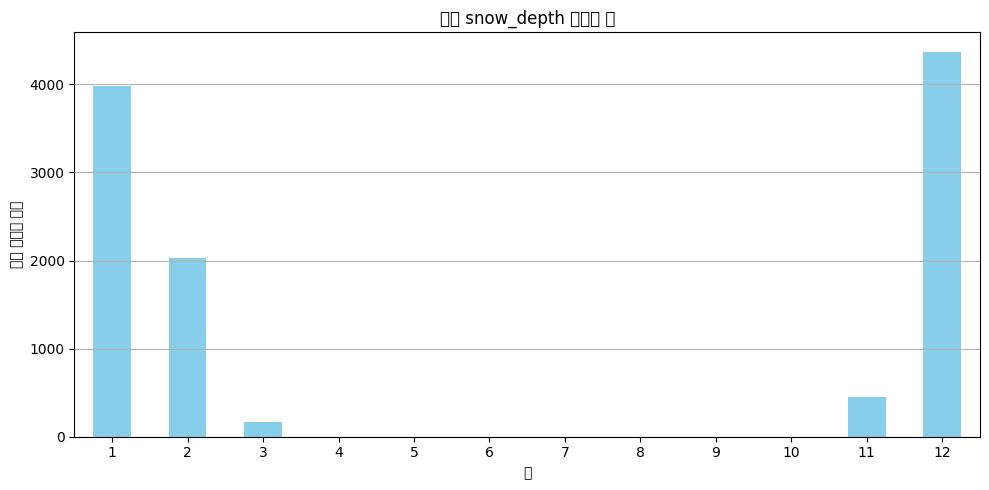

In [121]:
# snow_depth 컬럼들
snow_cols = [col for col in df.columns if 'snow_depth_' in col]

# 월별로 유효한(결측이 아닌) 값 개수 합산
monthly_snow_counts = df.groupby('month')[snow_cols].apply(lambda x: x.notna().sum().sum())

# 시각화
plt.figure(figsize=(10,5))
monthly_snow_counts.plot(kind='bar', color='skyblue')
plt.title("월별 snow_depth 데이터 수")
plt.xlabel("월")
plt.ylabel("유효 데이터 개수")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [122]:
snow_cols = [col for col in df.columns if 'snow_depth' in col]

# 해당 컬럼들에 대해 NaN을 0으로 대체
df[snow_cols] = df[snow_cols].fillna(0)
testD[snow_cols] = testD[snow_cols].fillna(0)

# **precipitation_n: 강수량(mm)**

일단 nan값을 0으로 함  
비가 온 날을 따로 잡고싶기에 일단 강수량 - (눈온날)을 할 예정

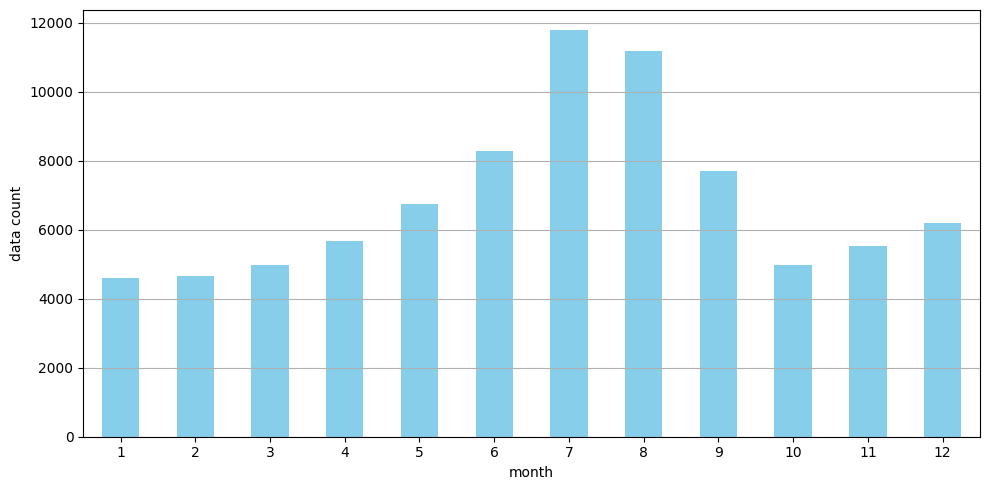

In [123]:
# snow_depth 컬럼들
snow_cols = [col for col in df.columns if 'precipitation_' in col]

# 월별로 유효한(결측이 아닌) 값 개수 합산
monthly_snow_counts = df.groupby('month')[snow_cols].apply(lambda x: x.notna().sum().sum())

# 시각화
plt.figure(figsize=(10,5))
monthly_snow_counts.plot(kind='bar', color='skyblue')
plt.xlabel("month")
plt.ylabel("data count")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [124]:
precip_cols = [f"precipitation_{i}" for i in range(24)]
snow_cols = [f"snow_depth_{i}" for i in range(24)]

df[precip_cols] = df[precip_cols].fillna(0)
df[snow_cols] = df[snow_cols].fillna(0)

# rainy_day_n 생성: 눈 온 시간대는 0, 나머지는 강수량 그대로
for i in range(24):
    df[f"rainy_day_{i}"] = df[f"precipitation_{i}"].where(df[f"snow_depth_{i}"] == 0, 0)

<ipython-input-124-b5d87c2ade84>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"rainy_day_{i}"] = df[f"precipitation_{i}"].where(df[f"snow_depth_{i}"] == 0, 0)
<ipython-input-124-b5d87c2ade84>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"rainy_day_{i}"] = df[f"precipitation_{i}"].where(df[f"snow_depth_{i}"] == 0, 0)
<ipython-input-124-b5d87c2ade84>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining 

<ipython-input-125-3fdb3c35e3eb>:13: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-125-3fdb3c35e3eb>:13: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-125-3fdb3c35e3eb>:13: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-125-3fdb3c35e3eb>:13: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-125-3fdb3c35e3eb>:13: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-125-3fdb3c35e3eb>:13: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-125-3fdb3c35e3eb>:13: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


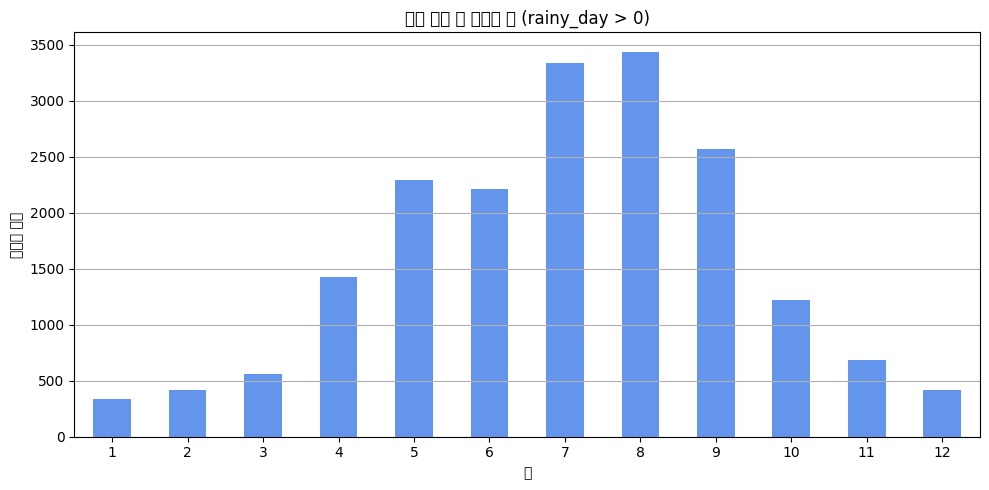

In [125]:
rainy_cols = [f"rainy_day_{i}" for i in range(24)]

# 월별로 0보다 큰 강수량의 개수 세기 (비가 온 시간의 개수)
rainy_counts = df.groupby('month')[rainy_cols].apply(lambda x: (x > 0).sum().sum())

plt.figure(figsize=(10, 5))
rainy_counts.plot(kind='bar', color='cornflowerblue')
plt.title("월별 비가 온 시간대 수 (rainy_day > 0)")
plt.xlabel("월")
plt.ylabel("데이터 개수")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **상대습도**

In [126]:
humidity_cols = [f"humidity_{i}" for i in range(24)]

# 1. -9999 값을 0으로 먼저 변환
df[humidity_cols] = df[humidity_cols].replace(-9999, 0)

humidity_cols = [f"humidity_{i}" for i in range(24)]

for i in range(24):
    col = f"humidity_{i}"

    # 이웃 인덱스 설정 (0~23 사이로 유지)
    prev_col = f"humidity_{i-1}" if i > 0 else None
    next_col = f"humidity_{i+1}" if i < 23 else None

    # 보간 조건 설정
    if prev_col and next_col:
        df[col] = df[col].mask(df[col].isna(), df[[prev_col, next_col]].mean(axis=1))
    elif prev_col:
        df[col] = df[col].mask(df[col].isna(), df[prev_col])
    elif next_col:
        df[col] = df[col].mask(df[col].isna(), df[next_col])

# **풍속**

In [127]:
for i in range(24):
    col = f"wind_speed_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

wind_speed_0: NaN = 11, -9999 = 2
wind_speed_1: NaN = 16, -9999 = 4
wind_speed_2: NaN = 14, -9999 = 5
wind_speed_3: NaN = 12, -9999 = 5
wind_speed_4: NaN = 16, -9999 = 2
wind_speed_5: NaN = 20, -9999 = 3
wind_speed_6: NaN = 13, -9999 = 7
wind_speed_7: NaN = 12, -9999 = 11
wind_speed_8: NaN = 7, -9999 = 15
wind_speed_9: NaN = 5, -9999 = 14
wind_speed_10: NaN = 5, -9999 = 11
wind_speed_11: NaN = 8, -9999 = 13
wind_speed_12: NaN = 5, -9999 = 15
wind_speed_13: NaN = 4, -9999 = 13
wind_speed_14: NaN = 8, -9999 = 7
wind_speed_15: NaN = 6, -9999 = 7
wind_speed_16: NaN = 6, -9999 = 9
wind_speed_17: NaN = 8, -9999 = 11
wind_speed_18: NaN = 9, -9999 = 8
wind_speed_19: NaN = 12, -9999 = 5
wind_speed_20: NaN = 10, -9999 = 5
wind_speed_21: NaN = 11, -9999 = 2
wind_speed_22: NaN = 10, -9999 = 2
wind_speed_23: NaN = 10, -9999 = 2


In [128]:
wind_speed_cols = [f"wind_speed_{i}" for i in range(24)]

# 1. -9999 → 0 처리
df[wind_speed_cols] = df[wind_speed_cols].replace(-9999, 0)

# 2. 선형 보간 (같은 행 기준, 시간 순서 방향으로)
df[wind_speed_cols] = df[wind_speed_cols].interpolate(axis=1, limit_direction='both')

# 표면 온도

학습에 쓸 예정  
시정 안 씀

In [129]:
for i in range(24):
    col = f"surface_temp_{i}"
    nan_count = df[col].isna().sum()
    neg_9999_count = (df[col] == -9999).sum()
    print(f"{col}: NaN = {nan_count}, -9999 = {neg_9999_count}")

surface_temp_0: NaN = 0, -9999 = 12
surface_temp_1: NaN = 0, -9999 = 7
surface_temp_2: NaN = 0, -9999 = 3
surface_temp_3: NaN = 0, -9999 = 4
surface_temp_4: NaN = 0, -9999 = 4
surface_temp_5: NaN = 0, -9999 = 10
surface_temp_6: NaN = 0, -9999 = 8
surface_temp_7: NaN = 0, -9999 = 7
surface_temp_8: NaN = 0, -9999 = 7
surface_temp_9: NaN = 0, -9999 = 8
surface_temp_10: NaN = 0, -9999 = 8
surface_temp_11: NaN = 0, -9999 = 13
surface_temp_12: NaN = 0, -9999 = 11
surface_temp_13: NaN = 0, -9999 = 8
surface_temp_14: NaN = 0, -9999 = 10
surface_temp_15: NaN = 0, -9999 = 9
surface_temp_16: NaN = 0, -9999 = 10
surface_temp_17: NaN = 0, -9999 = 10
surface_temp_18: NaN = 0, -9999 = 9
surface_temp_19: NaN = 0, -9999 = 9
surface_temp_20: NaN = 0, -9999 = 4
surface_temp_21: NaN = 0, -9999 = 4
surface_temp_22: NaN = 0, -9999 = 4
surface_temp_23: NaN = 0, -9999 = 5


In [130]:
surface_temp_cols = [f"surface_temp_{i}" for i in range(24)]

# 3. -9999 → np.nan 처리
df[surface_temp_cols] = df[surface_temp_cols].replace(-9999, np.nan)

# 4. spline 보간을 위해 컬럼 이름을 숫자(0~23)로 임시 변환
df_surface = df[surface_temp_cols].copy()
df_surface.columns = list(range(24))

# 5. spline 보간 적용 (2차 곡선, 시간 순서대로 보간)
df_surface = df_surface.interpolate(method='spline', order=2, axis=1, limit_direction='both')

# 6. 다시 원래 컬럼명으로 복구하고 df에 반영
df_surface.columns = surface_temp_cols
df[surface_temp_cols] = df_surface

#결측값 관측 함수

In [131]:
def check_missing(df, prefix):
    result = []
    for i in range(24):
        col = f"{prefix}_{i}"
        if col in df.columns:
            nan_count = df[col].isna().sum()
            neg_9999_count = (df[col] == -9999).sum()
            result.append({
                "column": col,
                "NaN_count": nan_count,
                "-9999_count": neg_9999_count
            })
    return pd.DataFrame(result)

#이슬점 온도

In [132]:
check_missing(df,"dew_point")

,column,NaN_count,-9999_count
0,dew_point_0,6,0
1,dew_point_1,8,0
2,dew_point_2,10,0
3,dew_point_3,10,0
4,dew_point_4,9,0
5,dew_point_5,17,0
6,dew_point_6,16,0
7,dew_point_7,14,0
8,dew_point_8,15,0
9,dew_point_9,15,0


In [133]:
def process_dew_point(df):
      # 1. dew_point 컬럼 리스트
      dew_cols = [f"dew_point_{i}" for i in range(24)]

      # 2. -9999 → NaN으로 변환 (혹시 있을 경우 대비)
      df[dew_cols] = df[dew_cols].replace(-9999, np.nan)

      # 3. 연속된 NaN 최대 개수 계산 함수
      def count_consecutive_nans(row):
          max_count = count = 0
          for val in row:
              if np.isnan(val):
                  count += 1
                  max_count = max(max_count, count)
              else:
                  count = 0
          return max_count

      # 4. 최대 연속 NaN 개수 구하기
      df["dew_point_max_consec_nan"] = df[dew_cols].apply(count_consecutive_nans, axis=1)

      # 5. 연속 NaN이 6개 이상인 row 제거
      df = df[df["dew_point_max_consec_nan"] < 6].copy()

      # 6. 시간 축 기준 보간 처리
      df[dew_cols] = df[dew_cols].interpolate(axis=1, limit_direction='both')

      # 7. (선택) 보조 컬럼 삭제
      df.drop(columns=["dew_point_max_consec_nan"], inplace=True)

      return df

In [134]:
df =  process_dew_point(df)

<ipython-input-133-bdc9a9eab022>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["dew_point_max_consec_nan"] = df[dew_cols].apply(count_consecutive_nans, axis=1)


#수증기압력, 현지기압, 해면기압

수증기압력 - dew_point와 humidity로 회귀 보간    
현지기압 & 해면기압 - 상호 대체 + 보간

In [135]:
check_missing(df,"vapor_pressure")

,column,NaN_count,-9999_count
0,vapor_pressure_0,2,0
1,vapor_pressure_1,3,0
2,vapor_pressure_2,1,0
3,vapor_pressure_3,2,0
4,vapor_pressure_4,2,0
5,vapor_pressure_5,9,0
6,vapor_pressure_6,8,0
7,vapor_pressure_7,6,0
8,vapor_pressure_8,7,0
9,vapor_pressure_9,9,0


In [136]:
check_missing(df,"local_pressure")

,column,NaN_count,-9999_count
0,local_pressure_0,0,8
1,local_pressure_1,0,3
2,local_pressure_2,0,0
3,local_pressure_3,0,1
4,local_pressure_4,0,1
5,local_pressure_5,0,7
6,local_pressure_6,0,5
7,local_pressure_7,0,4
8,local_pressure_8,0,4
9,local_pressure_9,0,4


In [137]:
check_missing(df,"sea_level_pressure")

,column,NaN_count,-9999_count
0,sea_level_pressure_0,0,8
1,sea_level_pressure_1,0,3
2,sea_level_pressure_2,0,0
3,sea_level_pressure_3,0,1
4,sea_level_pressure_4,0,1
5,sea_level_pressure_5,0,7
6,sea_level_pressure_6,0,5
7,sea_level_pressure_7,0,4
8,sea_level_pressure_8,0,4
9,sea_level_pressure_9,0,4


In [138]:
from sklearn.linear_model import LinearRegression
import numpy as np
def process_pressure_features(df):
    # 0. -9999 → NaN 변환 (전체 변수 대상)
    df.replace(-9999, np.nan, inplace=True)

    # 1. vapor_pressure: dew_point + humidity로 회귀 보간
    for i in range(24):
        vp = f"vapor_pressure_{i}"
        dp = f"dew_point_{i}"
        hum = f"humidity_{i}"

        valid = df[[vp, dp, hum]].dropna()

        # 회귀 가능한 데이터가 있을 때만 처리
        if valid.shape[0] >= 5:
            model = LinearRegression()
            model.fit(valid[[dp, hum]], valid[vp])

            # 예측할 위치: vapor_pressure만 NaN, 다른 둘은 값 있는 경우
            mask = df[vp].isna() & df[dp].notna() & df[hum].notna()
            if mask.any():
                df.loc[mask, vp] = model.predict(df.loc[mask, [dp, hum]])

    # 2. vapor_pressure 시간축 보간으로 남은 NaN 채우기
    vp_cols = [f"vapor_pressure_{i}" for i in range(24)]
    df[vp_cols] = df[vp_cols].interpolate(axis=1, limit_direction='both')

    # 3. local_pressure / sea_level_pressure 상호 대체 + 보간
    lp_cols = [f"local_pressure_{i}" for i in range(24)]
    slp_cols = [f"sea_level_pressure_{i}" for i in range(24)]

    for lp, slp in zip(lp_cols, slp_cols):
        df[lp] = df[lp].fillna(df[slp])
        df[slp] = df[slp].fillna(df[lp])

    df[lp_cols] = df[lp_cols].interpolate(axis=1, limit_direction='both')
    df[slp_cols] = df[slp_cols].interpolate(axis=1, limit_direction='both')

    # 4. 너무 많은 결측이 있었던 row 제거 (6개 이상)
    df = df[(df[vp_cols].isna().sum(axis=1) < 6) &
            (df[lp_cols].isna().sum(axis=1) < 6) &
            (df[slp_cols].isna().sum(axis=1) < 6)]

    # 5. 보간 여부 flag 피처 추가 (모델용)
    df["vapor_pressure_imputed"] = df[vp_cols].isna().sum(axis=1) > 0
    df["local_pressure_imputed"] = df[lp_cols].isna().sum(axis=1) > 0
    df["sea_level_pressure_imputed"] = df[slp_cols].isna().sum(axis=1) > 0

    return df

In [139]:
df = process_pressure_features(df)

# 데이터 학습

In [140]:
cloud_cols = [col for col in testD.columns if col.startswith('cloud_cover')]

# 각 컬럼에 대해 중앙값으로 결측값 보간
for col in cloud_cols:
    median_val = testD[col].median(skipna=True)
    testD[col] = testD[col].fillna(median_val)

In [142]:


# 2. wind_direction 처리
wind_cols = [f"wind_direction_{i}" for i in range(24)]
testD[wind_cols] = testD[wind_cols].replace(-9999, np.nan)
testD[wind_cols] = testD[wind_cols].interpolate(axis=1, limit_direction='both')
testD['wind_direction_mean'] = testD[wind_cols].mean(axis=1)

# 3. -9999 다시 체크해서 NaN 처리 (혹시 있을 경우 대비)
for col in wind_cols:
    testD[col] = np.where(testD[col] == -9999, np.nan, testD[col])

# 4. 풍향 → 7계절 구간 정수 매핑
def map_direction_to_season_code(degree):
    if pd.isna(degree):
        return np.nan
    degree = degree % 360
    if (degree >= 330 or degree < 30):
        return 0  # 겨울-봄 사이
    elif degree < 75:
        return 1  # 봄
    elif degree < 120:
        return 2  # 봄-여름 사이
    elif degree < 165:
        return 3  # 여름
    elif degree < 210:
        return 4  # 여름-가을 사이
    elif degree < 255:
        return 5  # 가을
    else:
        return 6  # 가을-겨울 사이

testD['season_from_wind'] = testD['wind_direction_mean'].apply(map_direction_to_season_code).astype("Int64")

# 5. 결측 season_from_wind → 월별 중앙값으로 대체
missing_mask = testD['season_from_wind'].isna()
month_median = testD.groupby('month')['season_from_wind'].median()

def fill_with_month_median(row):
    if pd.isna(row['season_from_wind']):
        return month_median.get(row['month'], np.nan)
    else:
        return row['season_from_wind']

testD['season_from_wind'] = testD.apply(fill_with_month_median, axis=1).astype('Int64')

In [143]:
sun_cols = [f"sunshine_duration_{i}" for i in range(24)]

for col in sun_cols:
    mean_val = testD[col].mean(skipna=True)

    if mean_val <= 0.2:
        testD[col] = testD[col].fillna(0)
    elif mean_val >= 0.8:
        testD[col] = testD[col].fillna(1)
    else:
        testD[col] = testD[col].fillna(mean_val)

In [144]:
precip_cols = [f"precipitation_{i}" for i in range(24)]
snow_cols = [f"snow_depth_{i}" for i in range(24)]

# 1. 결측값을 0으로 채움
testD[precip_cols] = testD[precip_cols].fillna(0)
testD[snow_cols] = testD[snow_cols].fillna(0)

# 2. 눈이 오면 강수량 무시 → rainy_day 생성
for i in range(24):
    testD[f"rainy_day_{i}"] = testD[f"precipitation_{i}"].where(testD[f"snow_depth_{i}"] == 0, 0)

<ipython-input-144-0fd7dd3cfdf6>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  testD[f"rainy_day_{i}"] = testD[f"precipitation_{i}"].where(testD[f"snow_depth_{i}"] == 0, 0)
<ipython-input-144-0fd7dd3cfdf6>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  testD[f"rainy_day_{i}"] = testD[f"precipitation_{i}"].where(testD[f"snow_depth_{i}"] == 0, 0)
<ipython-input-144-0fd7dd3cfdf6>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

In [145]:
# 1. humidity 컬럼 리스트
humidity_cols = [f"humidity_{i}" for i in range(24)]

# 2. -9999 값을 NaN으로 변환
testD[humidity_cols] = testD[humidity_cols].replace(-9999, np.nan)

# 3. 인접 시간대 평균으로 보간
for i in range(24):
    col = f"humidity_{i}"

    # 이웃 인덱스 설정 (0~23 사이로 유지)
    prev_col = f"humidity_{i-1}" if i > 0 else None
    next_col = f"humidity_{i+1}" if i < 23 else None

    # 보간 조건 설정
    if prev_col and next_col:
        testD[col] = testD[col].mask(testD[col].isna(), testD[[prev_col, next_col]].mean(axis=1))
    elif prev_col:
        testD[col] = testD[col].mask(testD[col].isna(), testD[prev_col])
    elif next_col:
        testD[col] = testD[col].mask(testD[col].isna(), testD[next_col])

In [146]:
wind_speed_cols = [f"wind_speed_{i}" for i in range(24)]

# 1. -9999 → 0 처리
testD[wind_speed_cols] = testD[wind_speed_cols].replace(-9999, 0)

# 2. 선형 보간 (같은 행 기준, 시간 순서 방향으로)
testD[wind_speed_cols] = testD[wind_speed_cols].interpolate(axis=1, limit_direction='both')

In [147]:
surface_temp_cols = [f"surface_temp_{i}" for i in range(24)]

# 3. -9999 → np.nan 처리
testD[surface_temp_cols] = testD[surface_temp_cols].replace(-9999, np.nan)

# 4. spline 보간을 위해 컬럼 이름을 숫자(0~23)로 임시 변환
testD_surface = df[surface_temp_cols].copy()
testD_surface.columns = list(range(24))

# 5. spline 보간 적용 (2차 곡선, 시간 순서대로 보간)
testD_surface = testD_surface.interpolate(method='spline', order=2, axis=1, limit_direction='both')

# 6. 다시 원래 컬럼명으로 복구하고 df에 반영
testD_surface.columns = surface_temp_cols
testD[surface_temp_cols] = testD_surface

In [148]:
testD =  process_dew_point(testD)

<ipython-input-133-bdc9a9eab022>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["dew_point_max_consec_nan"] = df[dew_cols].apply(count_consecutive_nans, axis=1)


In [149]:
testD = process_pressure_features(testD)

#모델학습